In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [40]:
df = pd.read_csv('C:/Users/SRTINNI/Desktop/covid_lstm.csv',index_col='Date',parse_dates=True)
df.index.asfreq='D'

In [41]:
df.head()

,Daily new cases
Date,
2020-03-15,2
2020-03-16,3
2020-03-17,2
2020-03-18,4
2020-03-19,3


<AxesSubplot:xlabel='Date'>

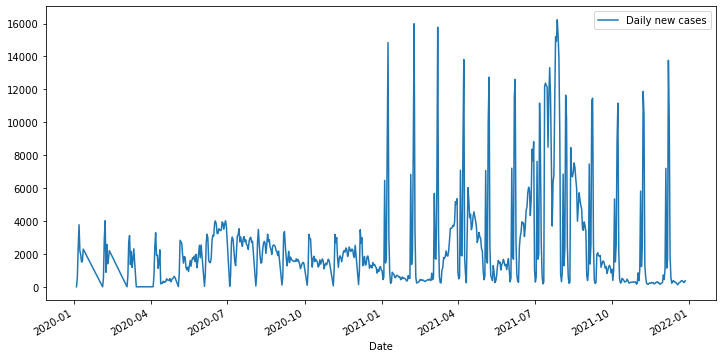

In [42]:
df.plot(figsize=(12,6))

In [45]:
#from statsmodels.tsa.seasonal import seasonal_decompose

In [46]:
#results = seasonal_decompose(df['Daily new cases'])
#results.plot();

In [47]:
len(df)

648

In [48]:
train = df.iloc[:636]
test = df.iloc[636:]

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [50]:
df.head(),df.tail()

(            Daily new cases
 Date                       
 2020-03-15                2
 2020-03-16                3
 2020-03-17                2
 2020-03-18                4
 2020-03-19                3,
             Daily new cases
 Date                       
 2021-12-23              382
 2021-12-24              342
 2021-12-25              275
 2021-12-26              268
 2021-12-27              373)

In [51]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [52]:
scaled_train[:10]

array([[6.16180911e-05],
       [1.23236182e-04],
       [6.16180911e-05],
       [1.84854273e-04],
       [1.23236182e-04],
       [1.23236182e-04],
       [2.46472364e-04],
       [6.16180911e-05],
       [3.08090455e-04],
       [3.08090455e-04]])

In [53]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [54]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [55]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[6.16180911e-05 1.23236182e-04 6.16180911e-05]
Predict this y: 
 [[0.00018485]]


In [56]:
X.shape

(1, 3, 1)

In [57]:
# We do the same thing, but now instead for 12 months/days
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [59]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [61]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
624/624 [==============================] - 6s 6ms/step - loss: 0.0052
Epoch 2/50
624/624 [==============================] - 4s 6ms/step - loss: 0.0042
Epoch 3/50
624/624 [==============================] - 4s 6ms/step - loss: 0.0034
Epoch 4/50
624/624 [==============================] - 4s 6ms/step - loss: 0.0036
Epoch 5/50
624/624 [==============================] - 4s 6ms/step - loss: 0.0030
Epoch 6/50
624/624 [==============================] - 4s 6ms/step - loss: 0.0029
Epoch 7/50
624/624 [==============================] - 4s 6ms/step - loss: 0.0029
Epoch 8/50
624/624 [==============================] - 4s 6ms/step - loss: 0.0026
Epoch 9/50
624/624 [==============================] - 4s 6ms/step - loss: 0.0028
Epoch 10/50
624/624 [==============================] - 4s 6ms/step - loss: 0.0026
Epoch 11/50
624/624 [==============================] - 4s 6ms/step - loss: 0.0024
Epoch 12/50
624/624 [==============================] - 4s 6ms/step - loss: 0.0025
Epoch 13/50
624/624 [====

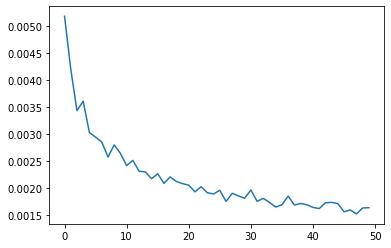

In [62]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [63]:
last_train_batch = scaled_train[-12:]

In [64]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [65]:
model.predict(last_train_batch)

array([[0.0211921]], dtype=float32)

In [66]:
scaled_test[0]

array([0.01577423])

In [67]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [68]:
test_predictions

[array([0.0211921], dtype=float32),
 array([0.02297777], dtype=float32),
 array([0.0245597], dtype=float32),
 array([0.02573904], dtype=float32),
 array([0.02651094], dtype=float32),
 array([0.0270992], dtype=float32),
 array([0.02768229], dtype=float32),
 array([0.02831341], dtype=float32),
 array([0.0289724], dtype=float32),
 array([0.02969615], dtype=float32),
 array([0.03043856], dtype=float32),
 array([0.03115509], dtype=float32)]

In [69]:
test.head()

,Daily new cases
Date,
2021-12-16,257
2021-12-17,191
2021-12-18,122
2021-12-19,211
2021-12-20,260


In [70]:
true_predictions = scaler.inverse_transform(test_predictions)

In [71]:
test['Predictions'] = true_predictions

<ipython-input-71-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='Date'>

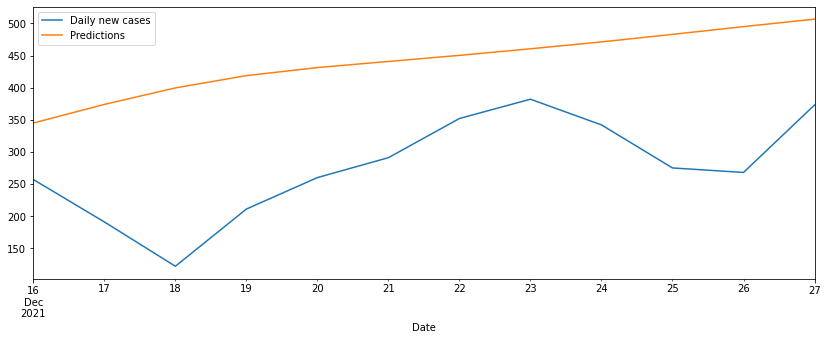

In [72]:
test.plot(figsize=(14,5))

In [73]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Daily new cases'],test['Predictions']))
print(rmse)

172.78803311266108
